## 기본 설치 페키지
```Bash
pip install pandas
pip install seaborn
pip install scikit-learn 
pip install matplotlib
```

## graphviz 가 설치 되었다면
```Bash
pip install graphviz
```

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## 데이터 불러오기

data : https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?resource=download

pandas의 csv 로더를 이용하여 불러온다

In [2]:
df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

## 데이터 확인하기

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 데이터 나누기 
> [!TIP]
> 소수점을 없에고 데이터를 나누어야 한다

학습 데이터와 테스트 데이터를 잘 나눠주도록 한다


In [6]:
split_count = int (df.shape[0] * 0.8)

test, train = df[split_count:].copy(), df[:split_count].copy()

## 학습에 사용할 컬럼

> [!NOTE]
> 학습에 필요한 컬럼만 가져와서 예측하는 것이 좋은 결과를 얻을 수 있다

In [7]:
feature_names = train.columns[:-1].tolist()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

## 예측할 컬럼
> [!NOTE]
> 예측에 사용할 적절한 컬럼 선택

In [8]:
label_name = train.columns[-1]
label_name

'Outcome'

## 학습 & 예측 세트 만들기 

In [14]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [20]:
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [21]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
614,11,138,74,26,144,36.1,0.557,50
615,3,106,72,0,0,25.8,0.207,27
616,6,117,96,0,0,28.7,0.157,30
617,2,68,62,13,15,20.1,0.257,23
618,9,112,82,24,0,28.2,1.282,50


In [22]:
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

## 모델 사용해 보기

In [26]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

## 학습 

fit 메서드는 데이터로 학습을 시킬 수 있다

In [27]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

## 예측 

predict 메서드는 이전 학습한 토데로 주어진 값의 데이터를 예측한다

In [37]:
y_predict =  model.predict(X_test)

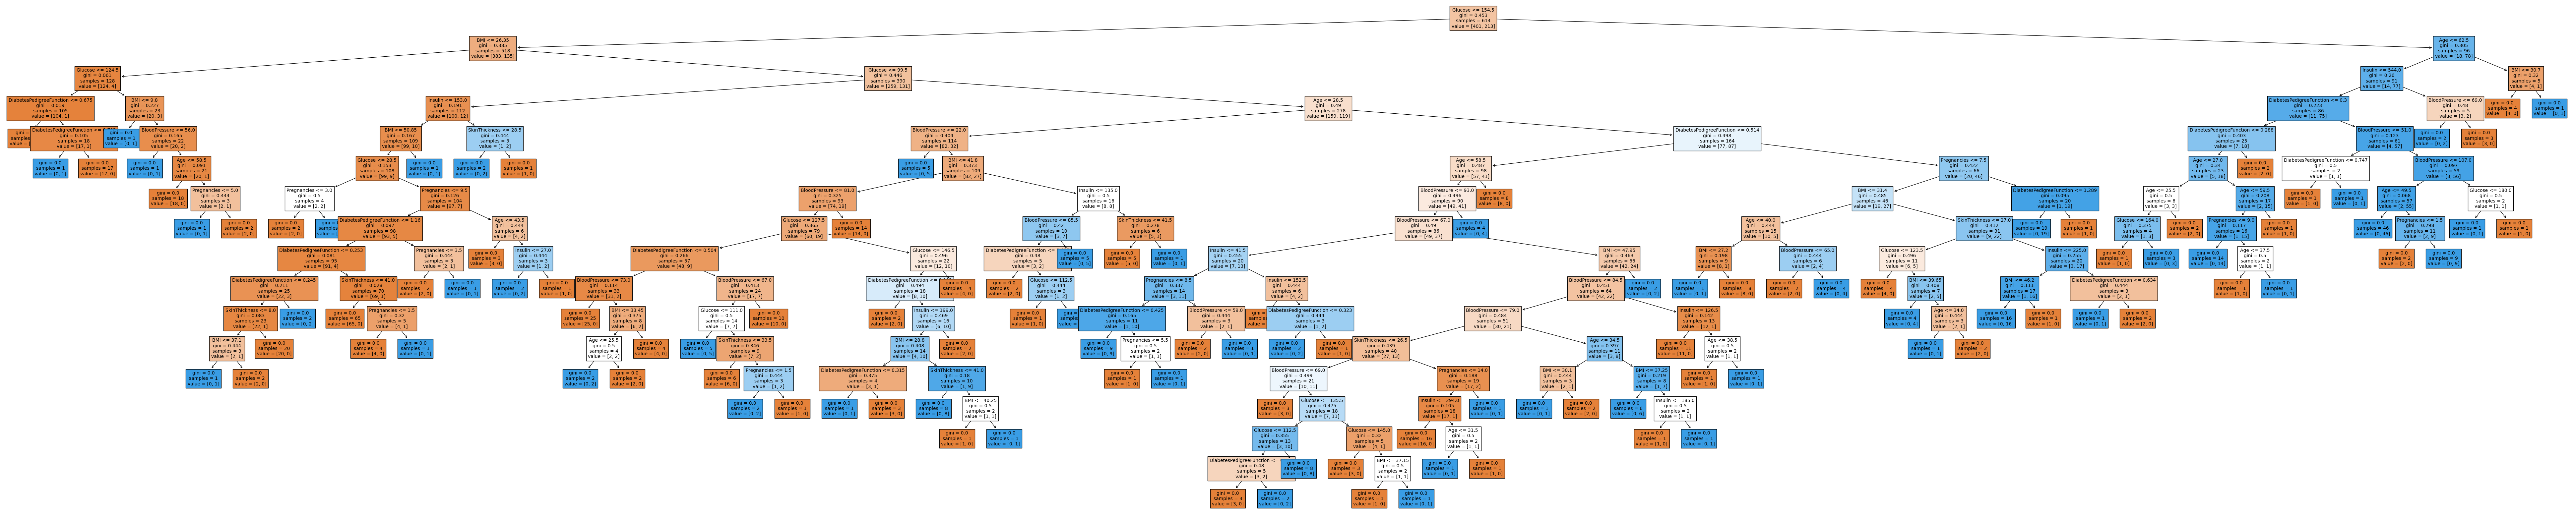

In [34]:
from sklearn.tree import plot_tree

plt.figure(figsize=(100,20))
tree = plot_tree(model, feature_names=feature_names, filled=True, fontsize=10)

## 모델의 연관성 확인

모델의 결과값에 영향을 끼치는 컬럼을 찾는 것을 한다

In [35]:
model.feature_importances_

array([0.07395714, 0.31652186, 0.12236248, 0.04400656, 0.06096106,
       0.15696536, 0.10956868, 0.11565686])

<Axes: >

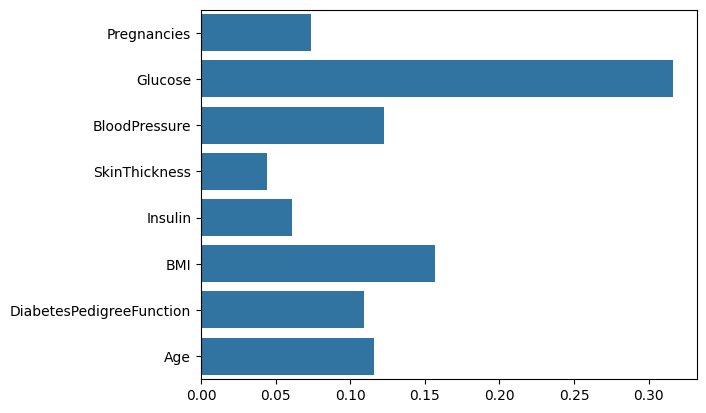

In [36]:
sns.barplot(x=model.feature_importances_, y=feature_names)

In [42]:
diff_count = abs(y_test - y_predict).sum()

In [44]:
(len(y_test) - diff_count) / len(y_test) * 100

74.02597402597402

In [46]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

74.02597402597402

In [47]:
model.score(X_test, y_test)

0.7402597402597403